# Approximating derivatives and calculating them using Julia

## First order approximation

In this section, we'll approximate the first order derivative of an $n$-order differentiable function $f$, using the Taylor expansion
$$
f(x) = \sum_{n=0}^\infty \frac{f^{(n)}(a)}{n!}(x-a)^n \;.
$$

### Forward

$$
\begin{align*}
& f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{3!}f^{(3)}(x) + \mathcal{O}(h^4)
\\
\Rightarrow & f'(x) = \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)
\end{align*}
$$

In [1]:
using CairoMakie, ColorSchemes

theme_notebook() = Theme(
    palette = (;
        color = ColorSchemes.mk_12,
        linestyle = [nothing, :dash, :dashdot, :dot]
    ),
    Lines = (
        linewidth=2.2,
        cycle = Cycle([:color, :linestyle], covary = true),
    )
);

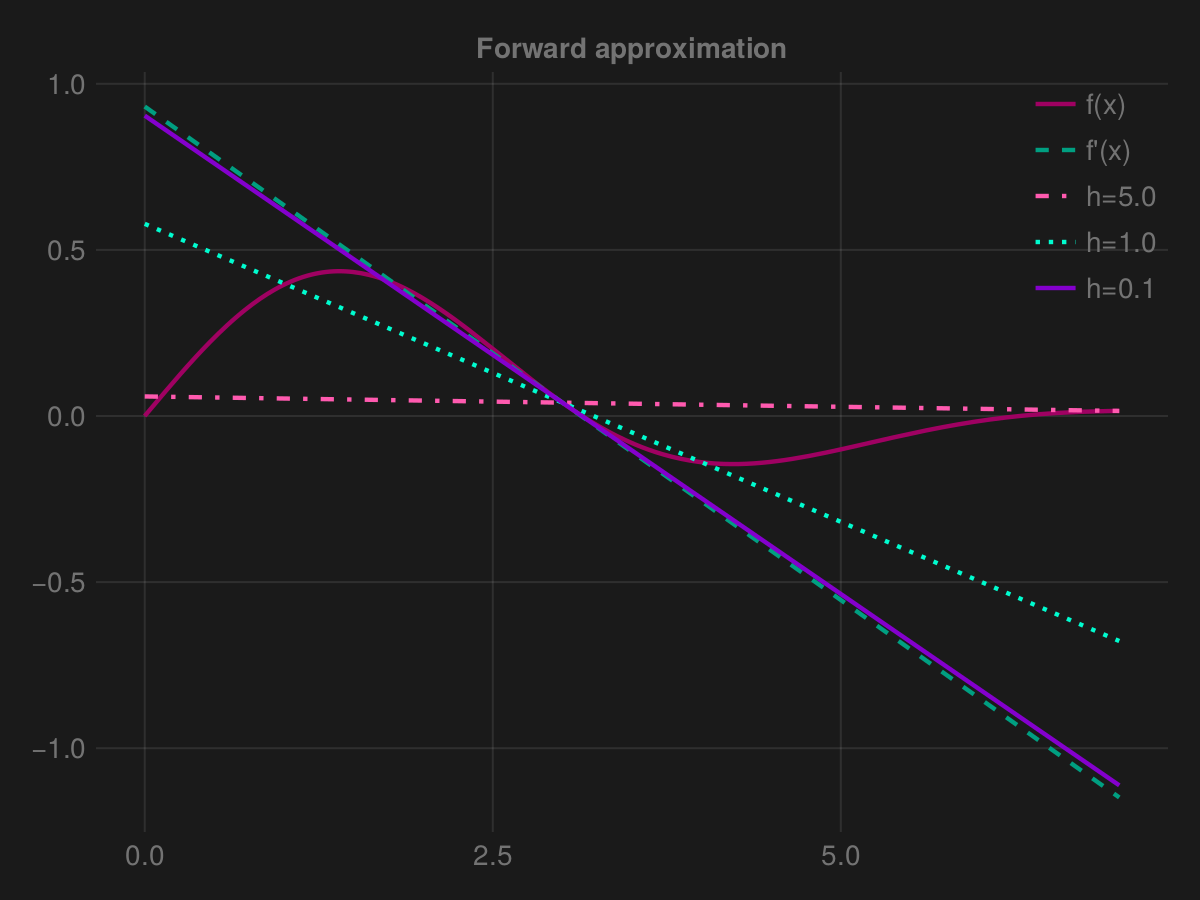

In [2]:
x0 = 3
f(x) = (1/2)*sin(x)*exp(-(x/4)^2)
h = 2

# Differentiating f
using Symbolics
@variables x1
f_x = build_function( Symbolics.derivative(f(x1), x1) , x1, expression = Val{false})

colors = ["#CF367E", "#F1AD74", "#309F46"]
with_theme(merge(theme_notebook(),theme_dark())) do 
    fig1 = Figure()
    ax1 = Axis(fig1[1,1], title = "Forward approximation")
    lines!(ax1, 0..7, f, label = "f(x)")
    lines!(ax1, 0..7, x -> f_x(x0)*(x-x0) + f(x0), label = "f'(x)")
    [lines!(ax1, 0..7, x -> ((f(x0+h)-f(x0))/h)*(x-x0) + f(x0), label = "h=$(h)") for (i,h) in enumerate([5, 1, 0.1]) ]
    axislegend()
    fig1
end


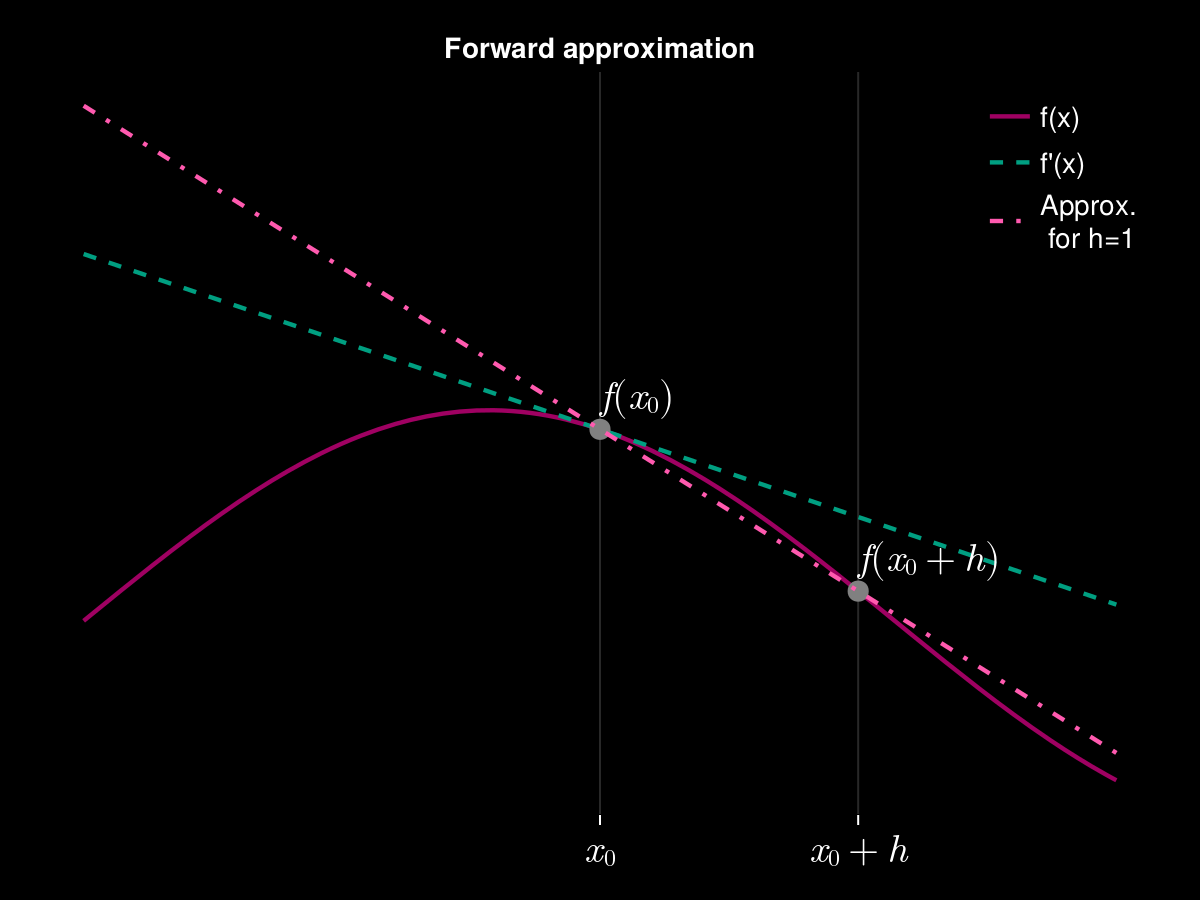

In [71]:
x0 = 2
f(x) = sin(x)
h = 1

# Differentiating f
using Symbolics
@variables x1
f_x = build_function( Symbolics.derivative(f(x1), x1) , x1, expression = Val{false})

with_theme(merge(theme_notebook(),theme_black())) do 
    fig1 = Figure()
    ax1 = Axis(fig1[1,1], title = "Forward approximation", xticklabelsize = 20,
                xticks = ([x0, x0+h], [L"x_0",L"x_0+h"])
        )
    lines!(ax1, 0..4, f, label = "f(x)")
    lines!(ax1, 0..4, x -> f_x(x0)*(x-x0) + f(x0), label = "f'(x)")
    scatter!(ax1, [x0, x0+h], f.([x0, x0+h]), color = :gray, markersize = 15)
    text!(ax1, [x0, x0+h], f.([x0, x0+h]) .+ 0.05, text = [L"f(x_0)", L"f(x_0 + h)"], align = (:left, :bottom), fontsize = 20)
    lines!(ax1, 0..4, x -> ((f(x0+h)-f(x0))/h)*(x-x0) + f(x0), label = "Approx. \n for h=$(h)")
    hidespines!(ax1)
    hidedecorations!(ax1, grid = false, ticklabels = false, ticks = false)
    hideydecorations!(ax1, ticklabels = true, ticks = true)
    axislegend(;framevisible = false)
    fig1
end

In [77]:
2*10^-3 < 3*10^-3 

true

### Backward

$$
\begin{align*}
& f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{3!}f^{(3)}(x) + \mathcal{O}(h^4)
\\
\Rightarrow & f'(x) = \frac{f(x) - f(x-h)}{h} + \mathcal{O}(h)
\end{align*}
$$

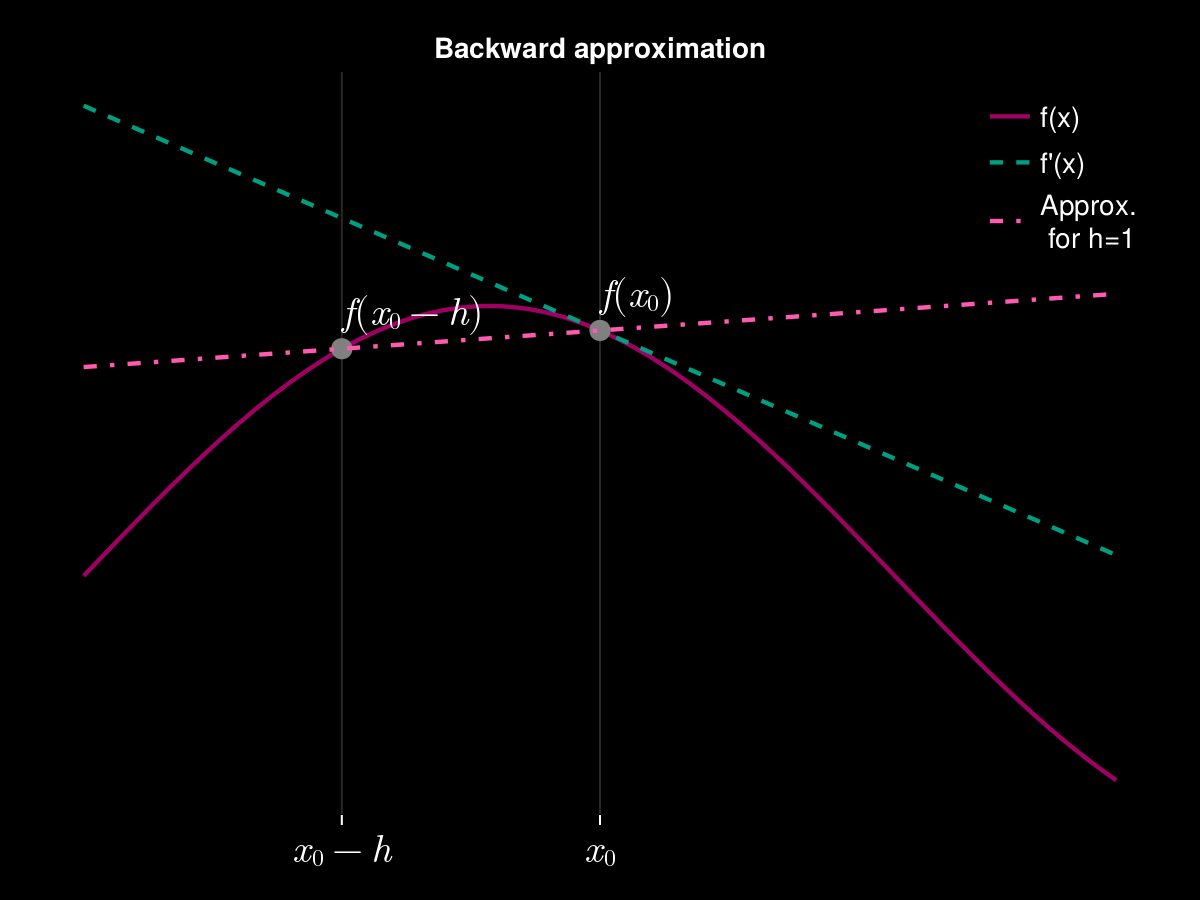

In [63]:
x0 = 2
f(x) = sin(x)
h = 1

# Differentiating f
using Symbolics
@variables x1
f_x = build_function( Symbolics.derivative(f(x1), x1) , x1, expression = Val{false})

with_theme(merge(theme_notebook(),theme_black())) do 
    fig1 = Figure()
    ax1 = Axis(fig1[1,1], title = "Backward approximation", xticklabelsize = 20,
                xticks = ([x0, x0-h], [L"x_0",L"x_0-h"])
        )
    lines!(ax1, 0..4, f, label = "f(x)")
    lines!(ax1, 0..4, x -> f_x(x0)*(x-x0) + f(x0), label = "f'(x)")
    scatter!(ax1, [x0, x0-h], f.([x0, x0-h]), color = :gray, markersize = 15)
    text!(ax1, [x0, x0-h], f.([x0, x0-h]) .+ 0.05, text = [L"f(x_0)", L"f(x_0 - h)"], align = (:left, :bottom), fontsize = 20)
    lines!(ax1, 0..4, x -> ((f(x0)-f(x0-h))/h)*(x-x0) + f(x0), label = "Approx. \n for h=$(h)")
    hidespines!(ax1)
    hidedecorations!(ax1, grid = false, ticklabels = false, ticks = false)
    hideydecorations!(ax1, ticklabels = true, ticks = true)
    axislegend(;framevisible = false)
    fig1
end

### Central


By adding the Taylor expansion of $f(x+h)$ and $f(x-h)$ together, we get the central difference approximation:
$$
\begin{align*}
   &\begin{rcases}
        \begin{align*}
            f(x+h) &= f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{3!}f^{(3)}(x) + \mathcal{O}(h^4)
            \\
            f(x-h) &= f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{3!}f^{(3)}(x) + \mathcal{O}(h^4)
        \end{align*}
    \end{rcases}
\\
\Rightarrow & f'(x) = \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h^2)
\end{align*}
$$

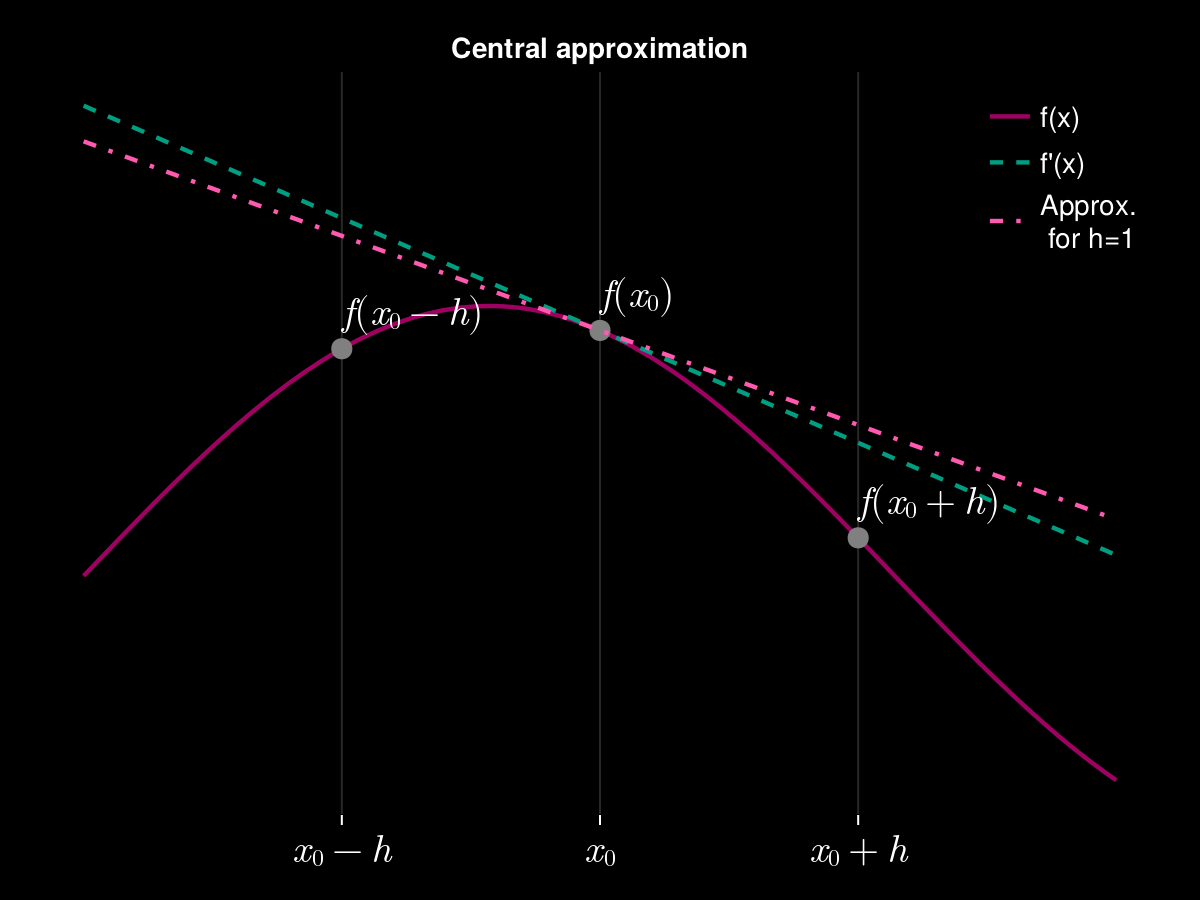

In [65]:
x0 = 2
f(x) = sin(x)
h = 1

# Differentiating f
using Symbolics
@variables x1
f_x = build_function( Symbolics.derivative(f(x1), x1) , x1, expression = Val{false})

with_theme(merge(theme_notebook(),theme_black())) do 
    fig1 = Figure()
    ax1 = Axis(fig1[1,1], title = "Central approximation", xticklabelsize = 20,
                xticks = ([x0-h, x0, x0+h], [L"x_0-h", L"x_0", L"x_0+h"])
        )
    lines!(ax1, 0..4, f, label = "f(x)")
    lines!(ax1, 0..4, x -> f_x(x0)*(x-x0) + f(x0), label = "f'(x)")
    scatter!(ax1, [x0-h, x0, x0+h], f.([x0-h, x0, x0+h]), color = :gray, markersize = 15)
    text!(ax1, [x0-h, x0, x0+h], f.([x0-h, x0, x0+h]) .+ 0.05, text = [L"f(x_0-h)",L"f(x_0)", L"f(x_0 + h)"], align = (:left, :bottom), fontsize = 20)
    lines!(ax1, 0..4, x -> ((f(x0+h)-f(x0-h))/(2h))*(x-x0) + f(x0), label = "Approx. \n for h=$(h)")
    hidespines!(ax1)
    hidedecorations!(ax1, grid = false, ticklabels = false, ticks = false)
    hideydecorations!(ax1, ticklabels = true, ticks = true)
    axislegend(;framevisible = false)
    fig1
end

### Example

In [74]:
h = 10 .^ range(-3, stop=-1, length=3)
xs = [0:h[i]:π for i in 1:length(h)]
ys = [sin.(xs[i]) for i in 1:length(h)];

forwards = [diff(ys[i]) ./ h[i] for i in 1:length(h)]
centrals = [(ys[i][3:end] .- ys[i][1:end-2]) ./ (2h[i]) for i in 1:length(h)]
backwards = [(ys[i][2:end] .- ys[i][1:end-1]) ./ h[i] for i in 1:length(h)];

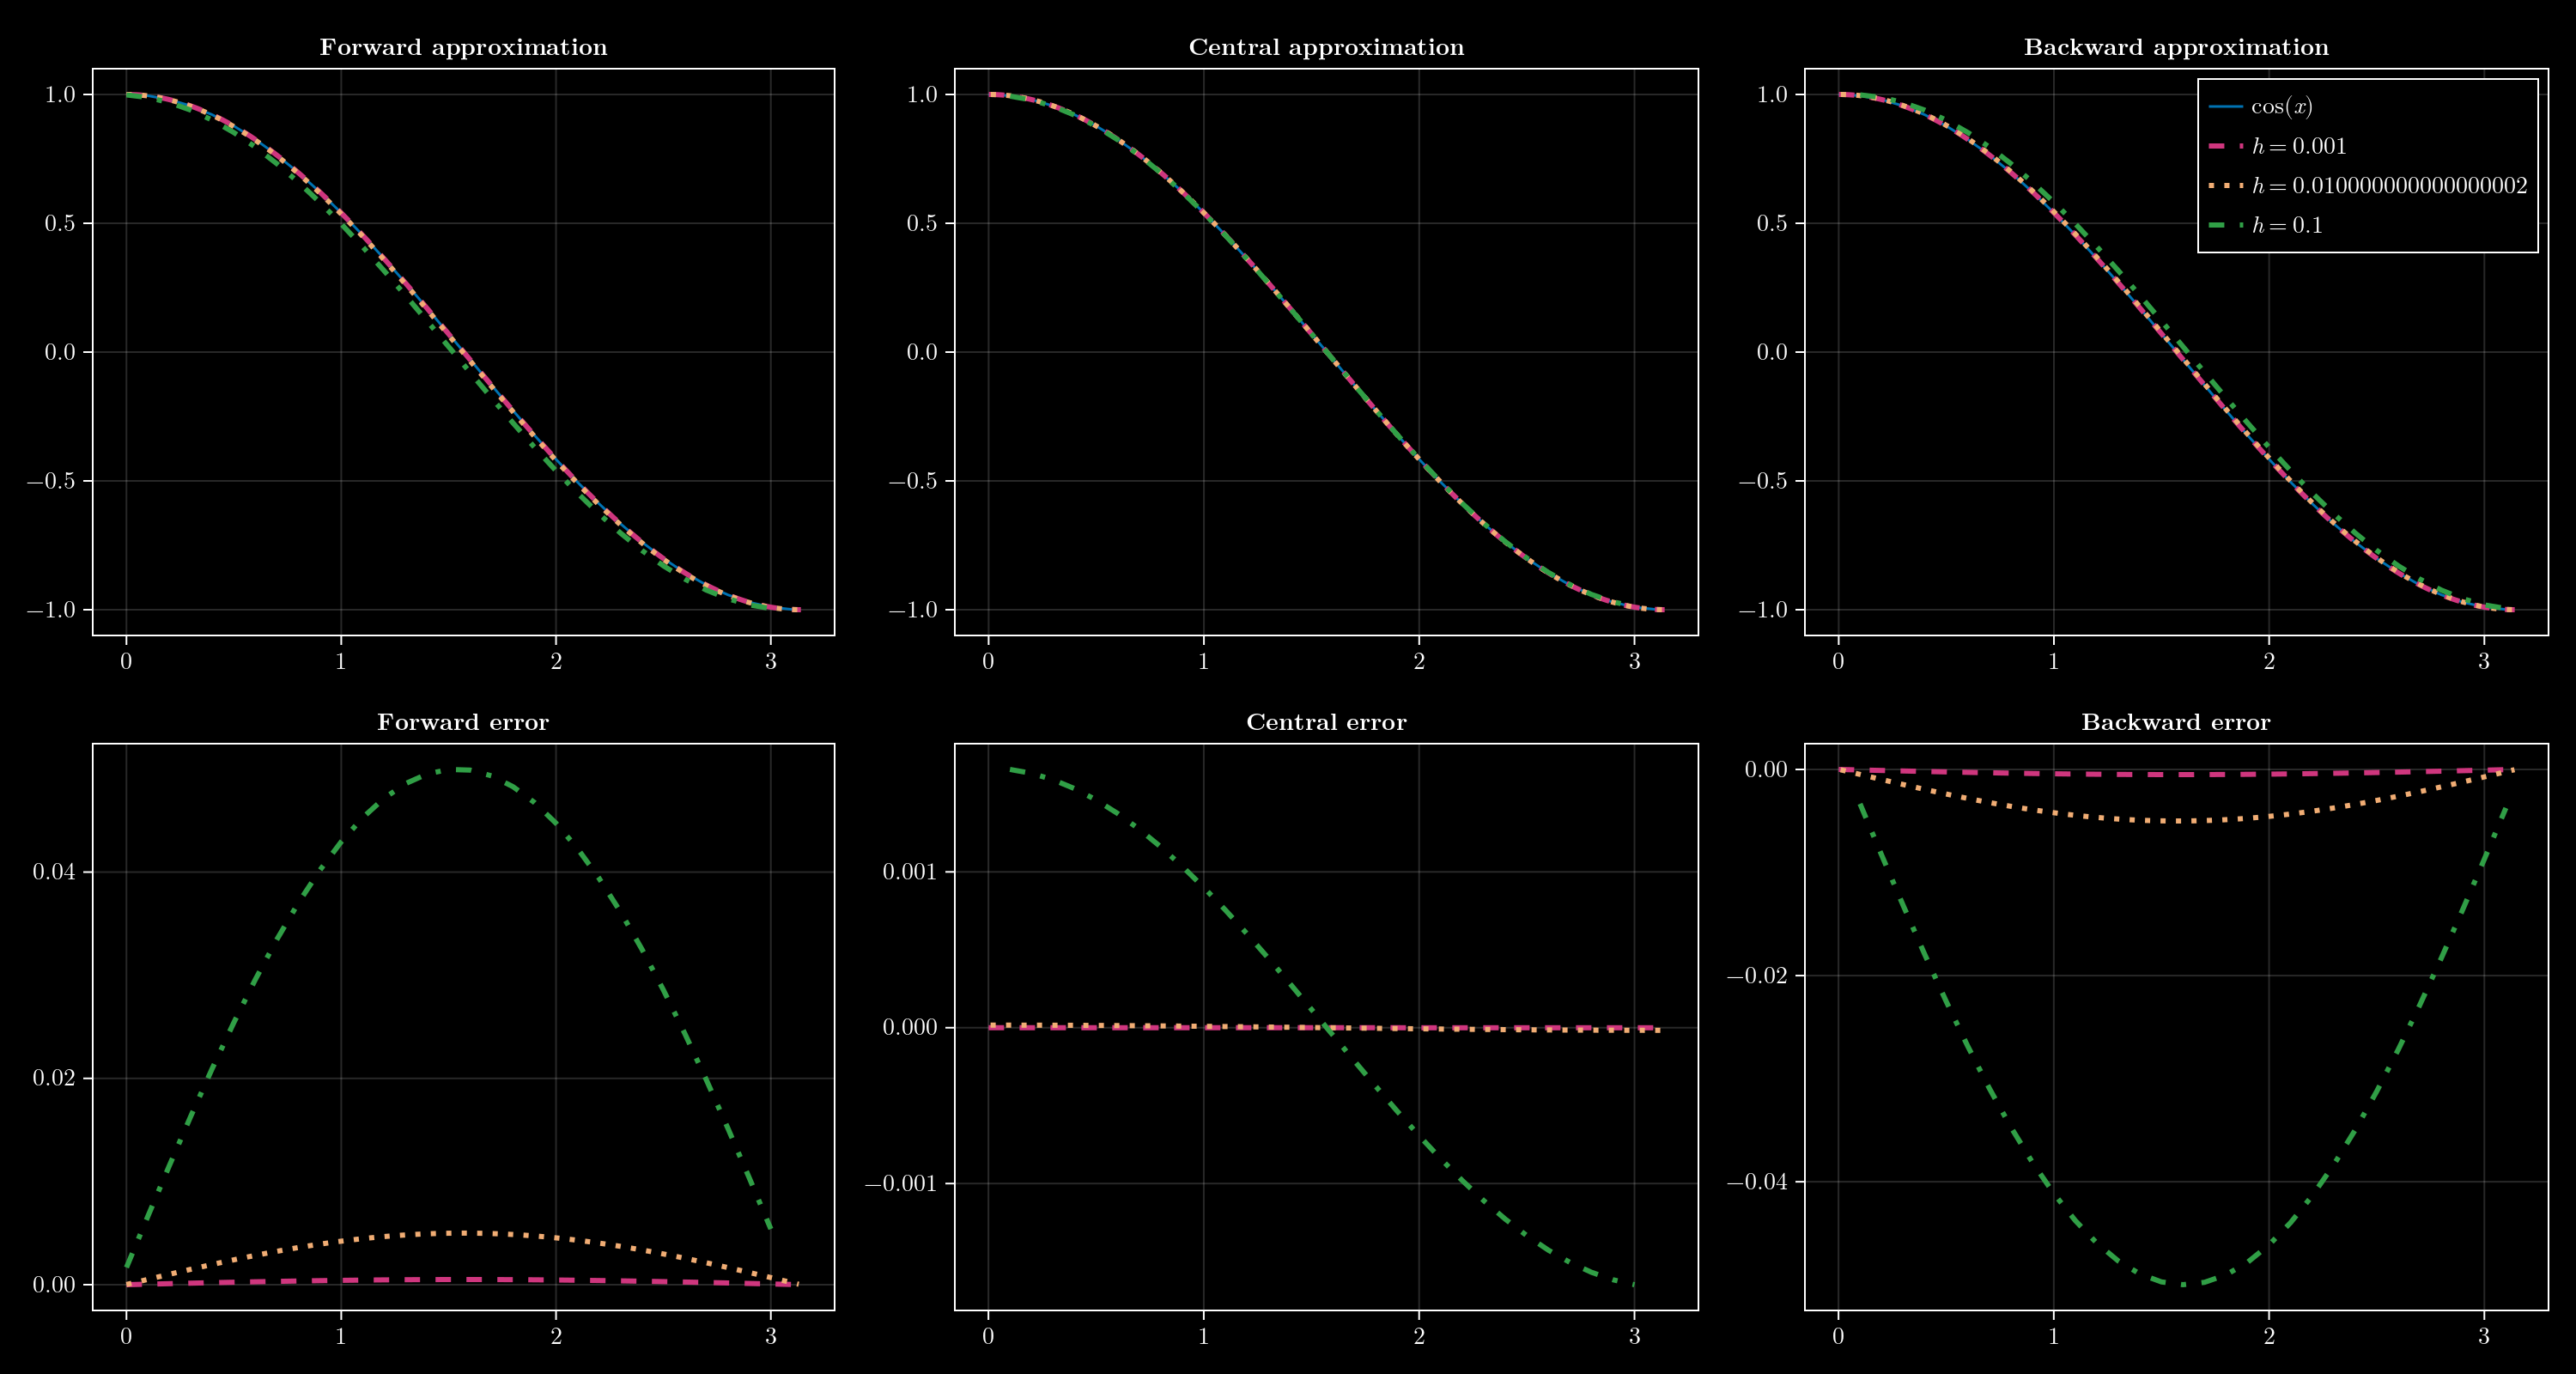

In [75]:
using CairoMakie, Colors

linestyles = [:dash, :dot, :dashdot]
colors = ["#CF367E", "#F1AD74", "#309F46"]

with_theme(merge(theme_latexfonts(),theme_black())) do
    fig = Figure(size = (1500, 800))
    axA = Axis(fig[1,1], title = "Forward approximation")
    lines!(axA, xs[end], cos.(xs[end]), label = L"\cos(x)")
    for i in 1:length(h)
        lines!(axA, xs[i][1:end-1], forwards[i], label = L"h = %$(h[i])", linewidth = 3, linestyle = linestyles[i], color = colors[i])
    end

    axB = Axis(fig[1,2], title = "Central approximation")
    lines!(axB, xs[end], cos.(xs[end]), label = L"\cos(x)")
    for i in 1:length(h)
        lines!(axB, xs[i][2:end-1], centrals[i], label = L"h = %$(h[i])", linewidth = 3, linestyle = linestyles[i], color = colors[i])
    end

    axC = Axis(fig[1,3], title = "Backward approximation")
    lines!(axC, xs[end], cos.(xs[end]), label = L"\cos(x)")
    for i in 1:length(h)
        lines!(axC, xs[i][2:end], backwards[i], label = L"h = %$(h[i])", linewidth = 3, linestyle = linestyles[i], color = colors[i])
    end

    axD = Axis(fig[2,1], title = "Forward error")
    for i in 1:length(h)
        lines!(axD, xs[i][1:end-1], cos.(xs[i][1:end-1]).- forwards[i], label = L"h = %$(h[i])", linewidth = 3, linestyle = linestyles[i], color = colors[i])
    end

    axE = Axis(fig[2,2], title = "Central error")
    for i in 1:length(h)
        lines!(axE, xs[i][2:end-1], cos.(xs[i][2:end-1]).- centrals[i], label = L"h = %$(h[i])", linewidth = 3, linestyle = linestyles[i], color = colors[i])
    end    

    axF = Axis(fig[2,3], title = "Backward error")
    for i in 1:length(h)
        lines!(axF, xs[i][2:end], cos.(xs[i][2:end]).- backwards[i], label = L"h = %$(h[i])", linewidth = 3, linestyle = linestyles[i], color = colors[i])
    end

    axislegend(axC)
    fig
end

## Second order approximation


$$
\begin{align*}
   &\begin{rcases}
        \begin{align*}
            f(x+h) &= f(x) + hf'(x) + \frac{1}{2}h^2f''(x) + \frac{h^3}{3!}f^{(3)}(x) + \frac{h^4}{4!}f^{(4)}(x) + \mathcal{O}(h^5)
            \\
            f(x-h) &= f(x) - hf'(x) + \frac{1}{2}h^2f''(x) - \frac{h^3}{3!}f^{(3)}(x) + \frac{h^4}{4!}f^{(4)}(x) + \mathcal{O}(h^5)
        \end{align*}
    \end{rcases}
\\
\Rightarrow & f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} + \mathcal{O}(h^2)
\end{align*}
$$

This time, we weren't able to get an even smaller error, due to the division of the term $\frac{h^4}{24}f^{(4)}(x)$ with $h^2$ being equal to $\mathcal{O}(h^2)$.

| Scheme   | $f'(x)$ approximation  | Error |
| -------- | :---: | :---: | 
| Forward  | $ \frac{f(x+h)-f(x)}{h}$ | $\mathcal{O}(h)$ |
| Backward | $ \frac{f(x)-f(x-h)}{h}$ | $\mathcal{O}(h)$ |
| Central  | $ \frac{f(x+h)-f(x-h)}{2h}$ | $\mathcal{O}(h^2)$ | 

| Scheme   | $f''(x)$ approximation  | Error |
| -------- | :---: | :---: |
| Forward  | $ \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$ | |
| Backward | $ \frac{f(x)-2f(x-h) + f(x-2h)}{h^2}$ | | 
| Central  | $ \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$ | $\mathcal{O}(h^2)$ |

$
\begin{equation} 
    f'(x) = \lim_{h\to0} \frac{f(x+h)-f(x)}{h}
\end{equation}
$